In [98]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.options.display.max_rows = 100
pd.options.display.max_columns = 20

In [99]:
df = pd.read_csv('covid-vaccination-vs-death_ratio.csv')
df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809
...,...,...,...,...,...,...,...,...,...,...
32906,32906,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,2,15229891.0,31.612715
32907,32907,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,2,15229891.0,32.083237
32908,32908,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,1,15229891.0,32.292726
32909,32909,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,1,15229891.0,32.668868


renomeando o nome das colunas

In [58]:
df = df.rename(columns={"country": "paises", "iso_code": "abreviaçao_pais",
                        "total_vaccinations":"Total_doses",  "people_vaccinated": "Pessoas_vacinadas",
                        "people_fully_vaccinated": "Pessoas_totalmente_vacinadas",
                        "New_deaths": "Novas_mortes_diarias",
                         "population": "Populaçao", "ratio": "%_populaçao_vacinada"})

In [59]:
df.describe()

,Unnamed: 0,Total_doses,Pessoas_vacinadas,Pessoas_totalmente_vacinadas,Novas_mortes_diarias,Populaçao,%_populaçao_vacinada
count,32911.000000,3.291100e+04,3.291100e+04,3.291100e+04,32911.000000,3.291100e+04,32911.000000
mean,16455.000000,3.689489e+07,2.035846e+07,1.471013e+07,100.043116,5.164060e+07,41.971287
std,9500.731691,1.411509e+08,7.843235e+07,5.735093e+07,339.500099,1.645294e+08,28.970518
min,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,-2440.000000,1.373000e+03,0.000011
25%,8227.500000,7.289180e+05,4.571090e+05,2.313500e+05,1.000000,2.962425e+06,13.697569
50%,16455.000000,4.552479e+06,2.724528e+06,1.693674e+06,9.000000,1.034057e+07,41.530473
75%,24682.500000,2.065201e+07,1.158203e+07,7.907290e+06,49.000000,3.826123e+07,68.147335
max,32910.000000,3.243599e+09,1.275541e+09,1.240777e+09,11447.000000,1.447065e+09,124.737373


removendo numeros de mortes negativos

In [60]:
df = df.drop(df[(df['Novas_mortes_diarias']< 0)].index)

In [61]:
df[df['Novas_mortes_diarias'] < 0]

,Unnamed: 0,paises,abreviaçao_pais,date,Total_doses,Pessoas_vacinadas,Pessoas_totalmente_vacinadas,Novas_mortes_diarias,Populaçao,%_populaçao_vacinada


criando coluna data_time trabalhar com series temporal

In [62]:
df['date_time'] = pd.to_datetime(df['date'])

removendo 2 coluna 

In [63]:
df_limpo = df.drop(['Unnamed: 0','abreviaçao_pais'],axis=1)

In [64]:
print(df_limpo['date'].min())
print(df_limpo['date'].max())

2020-12-13
2022-03-29


jogando coluna date_time pro index ordenando por index

In [65]:
df_limpo = df_limpo.set_index('date_time').sort_index()

In [66]:
df_brasil = df_limpo[df_limpo['paises']== 'Brazil']

vendo quantas pessoal morreu somando as 50 datas no brasil

In [67]:
df_brasil.head(50).Novas_mortes_diarias.sum()

74376

In [68]:
df_brasil.tail(10)

,paises,date,Total_doses,Pessoas_vacinadas,Pessoas_totalmente_vacinadas,Novas_mortes_diarias,Populaçao,%_populaçao_vacinada
date_time,,,,,,,,
2022-03-20,Brazil,2022-03-20,407435784.0,180360121.0,158863543.0,373,214832901.0,83.953678
2022-03-21,Brazil,2022-03-21,408348030.0,180469257.0,159101357.0,304,214832901.0,84.004478
2022-03-22,Brazil,2022-03-22,408961974.0,180523619.0,159240417.0,103,214832901.0,84.029782
2022-03-23,Brazil,2022-03-23,409606978.0,180592464.0,159388079.0,97,214832901.0,84.061828
2022-03-24,Brazil,2022-03-24,410175836.0,180653782.0,159513421.0,394,214832901.0,84.090370
2022-03-25,Brazil,2022-03-25,410860641.0,180726798.0,159673499.0,302,214832901.0,84.124358
2022-03-26,Brazil,2022-03-26,411116197.0,180757995.0,159756178.0,312,214832901.0,84.138879
2022-03-27,Brazil,2022-03-27,411548202.0,180800024.0,159842858.0,256,214832901.0,84.158443
2022-03-28,Brazil,2022-03-28,412177025.0,180881628.0,160008924.0,0,214832901.0,84.196428


vendo quantas pessoas morreu somando as 50 datas estados unidos

In [69]:
df_USA = df_limpo[df_limpo['paises']== 'United States of America']
df_USA.head(50).Novas_mortes_diarias.sum()

149620

In [70]:
df_USA.tail(10)

,paises,date,Total_doses,Pessoas_vacinadas,Pessoas_totalmente_vacinadas,Novas_mortes_diarias,Populaçao,%_populaçao_vacinada
date_time,,,,,,,,
2022-03-19,United States of America,2022-03-19,559133968.0,255074171.0,217252176.0,1064,334058426.0,76.356155
2022-03-20,United States of America,2022-03-20,559204399.0,255095459.0,217268780.0,966,334058426.0,76.362528
2022-03-21,United States of America,2022-03-21,559374965.0,255142756.0,217308386.0,198,334058426.0,76.376686
2022-03-22,United States of America,2022-03-22,559538180.0,255185606.0,217347289.0,150,334058426.0,76.389513
2022-03-23,United States of America,2022-03-23,559705459.0,255231156.0,217386954.0,779,334058426.0,76.403149
2022-03-24,United States of America,2022-03-24,559861103.0,255273235.0,217422759.0,934,334058426.0,76.415745
2022-03-25,United States of America,2022-03-25,560045501.0,255322519.0,217466150.0,1245,334058426.0,76.430498
2022-03-26,United States of America,2022-03-26,560137738.0,255348742.0,217488822.0,896,334058426.0,76.438348
2022-03-27,United States of America,2022-03-27,560167076.0,255357149.0,217495812.0,770,334058426.0,76.440865


verificando os paises com maior porcentagem de vacinaçao

In [71]:
df_top_vacinados = df_limpo.groupby('paises')['%_populaçao_vacinada'].max().sort_values(ascending=False)
df_top_vacinados

paises
Gibraltar               124.737373
Malta                   106.760570
Niue                    101.914762
United Arab Emirates     98.397065
Portugal                 95.204947
                           ...    
Papua New Guinea          3.439691
Yemen                     2.083710
Chad                      1.639191
Haiti                     1.408404
Burundi                   0.083178
Name: %_populaçao_vacinada, Length: 197, dtype: float64

grafico mostrando evoluçao do brasil somados pelos meses ocorre uma queda nos meses de dezembro devido a falta de dados de alguns dias

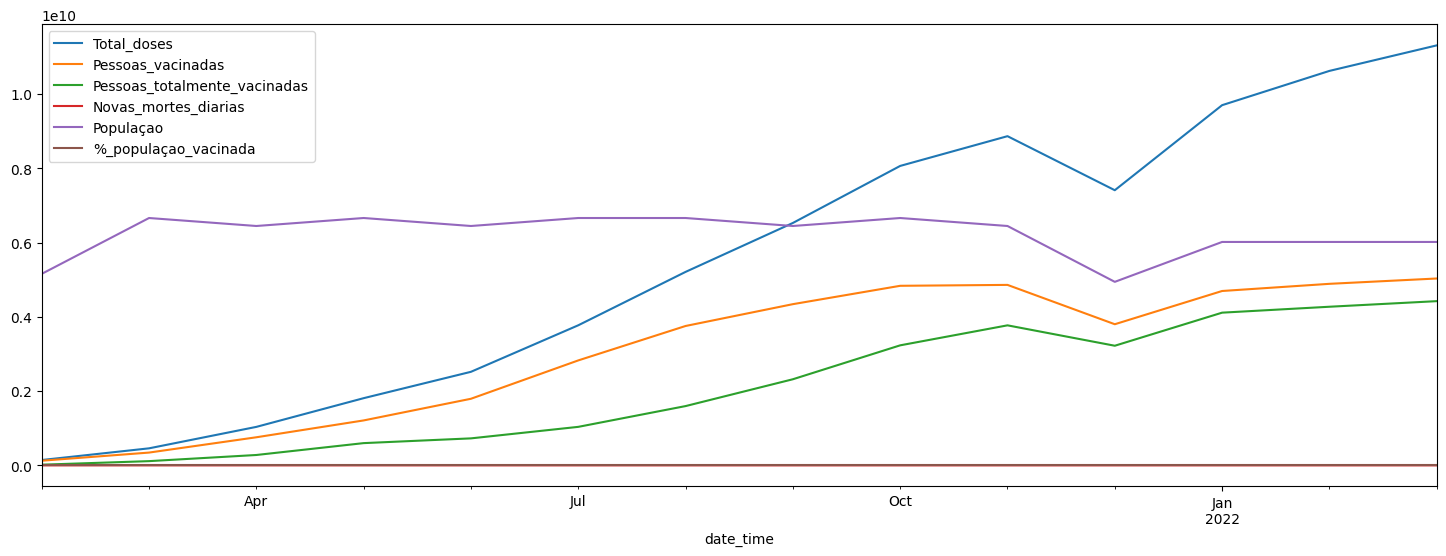

In [72]:
data_mes_BR = df_brasil.resample('M').sum().plot(figsize=(18, 6))

curva evoluçao estados unidos

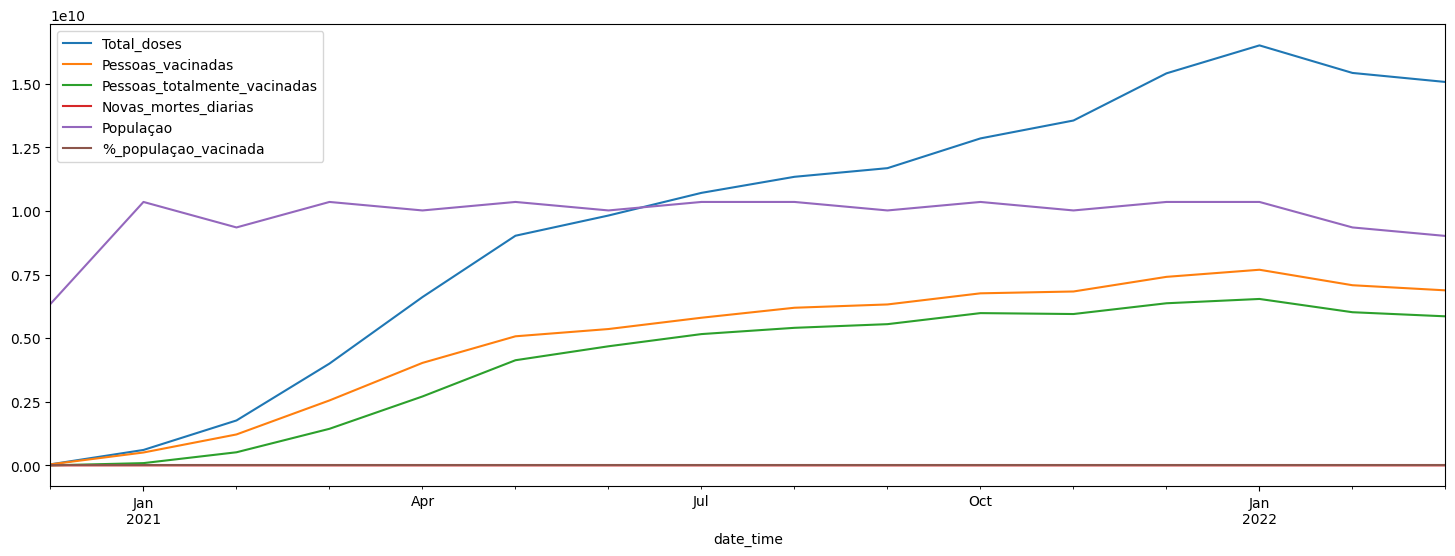

In [73]:
data_mes_USA = df_USA.resample('M').sum().plot(figsize=(18, 6))

<AxesSubplot:xlabel='date_time'>

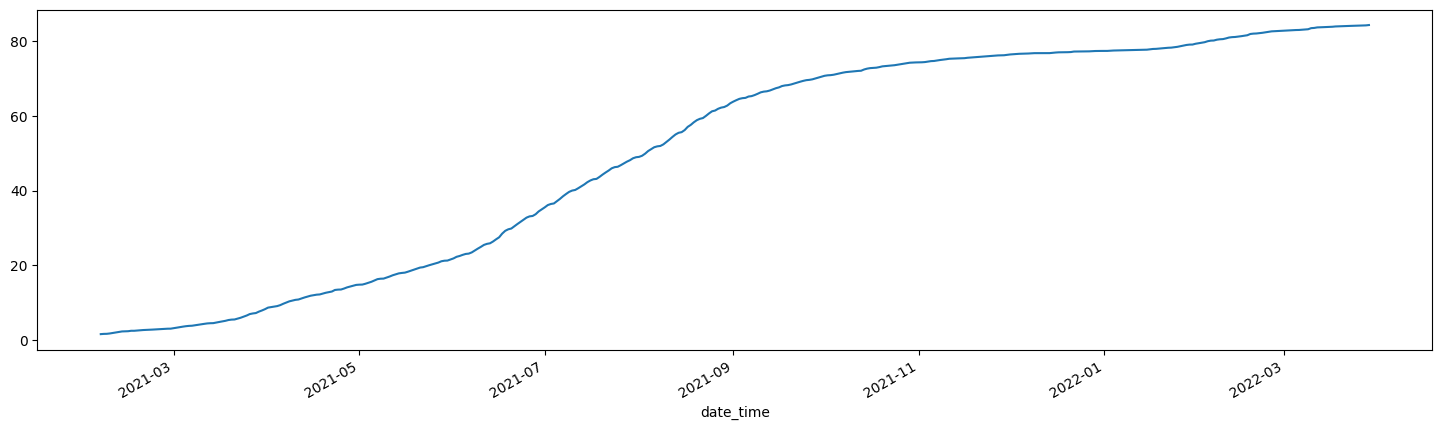

In [74]:
df_brasil['%_populaçao_vacinada'].plot(figsize=(18, 5))

<AxesSubplot:xlabel='date_time'>

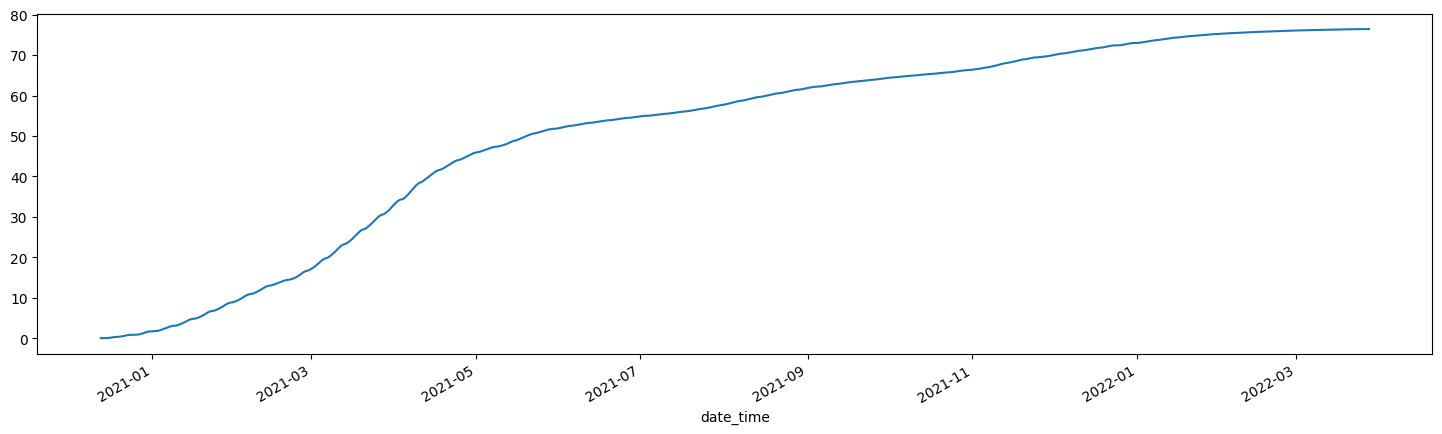

In [75]:
df_USA['%_populaçao_vacinada'].plot(figsize=(18, 5))

In [76]:
df_populaçao_vac_BR = df_brasil['%_populaçao_vacinada']
df_populaçao_vac_USA = df_USA['%_populaçao_vacinada']

In [77]:
df_nova_mortes_BR = df_brasil['Novas_mortes_diarias']
df_nova_mortes_USA = df_USA['Novas_mortes_diarias']

In [78]:
df_nova_mortes_BR.sum()

430694

In [79]:
df_nova_mortes_USA.sum()

673358

<AxesSubplot:xlabel='date_time'>

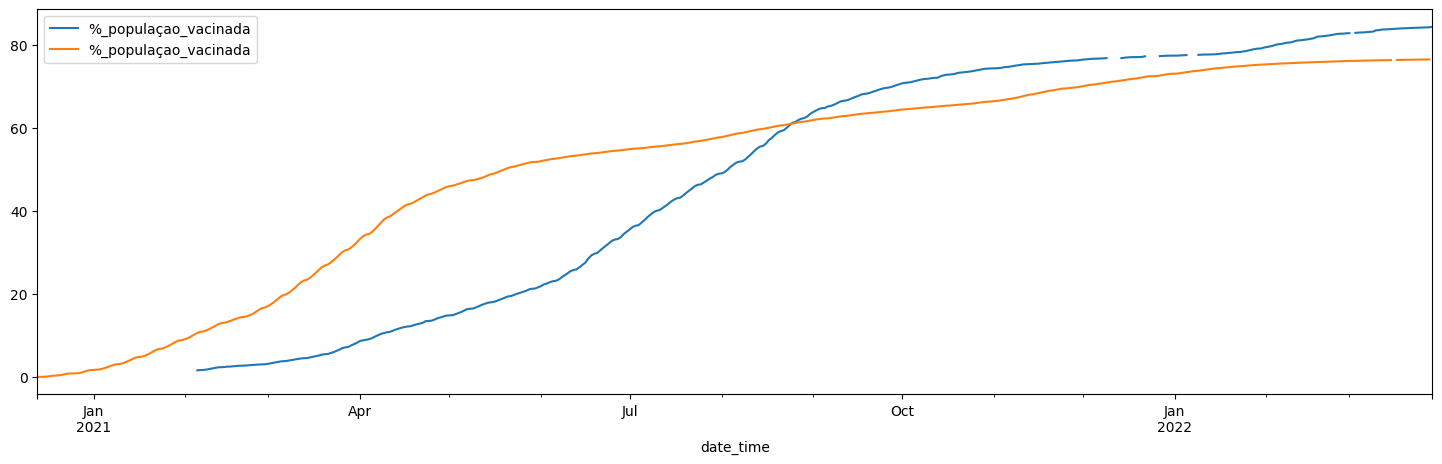

In [80]:
pd.concat([df_populaçao_vac_BR,df_populaçao_vac_USA],axis=1).plot(figsize=(18, 5))

<AxesSubplot:xlabel='date_time'>

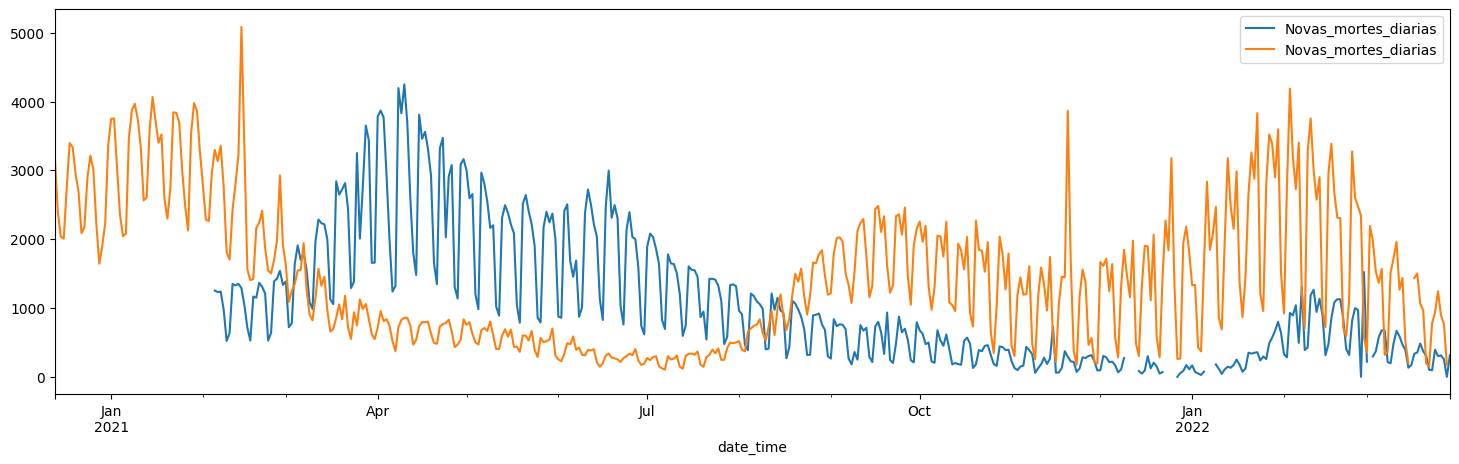

In [81]:
pd.concat([df_nova_mortes_BR,df_nova_mortes_USA],axis=1).plot(figsize=(18, 5))

In [82]:
df_teste = df_limpo.reset_index()
df_teste

,date_time,paises,date,Total_doses,Pessoas_vacinadas,Pessoas_totalmente_vacinadas,Novas_mortes_diarias,Populaçao,%_populaçao_vacinada
0,2020-12-13,United States of America,2020-12-13,30288.0,25125.0,5897.0,3193,334058426.0,0.007521
1,2020-12-14,United States of America,2020-12-14,34867.0,29543.0,6017.0,2403,334058426.0,0.008844
2,2020-12-15,United States of America,2020-12-15,84638.0,76984.0,6281.0,2038,334058426.0,0.023045
3,2020-12-16,United States of America,2020-12-16,244549.0,231496.0,6757.0,2008,334058426.0,0.069298
4,2020-12-17,United States of America,2020-12-17,517161.0,496980.0,7507.0,2740,334058426.0,0.148770
...,...,...,...,...,...,...,...,...,...
32900,2022-03-29,Estonia,2022-03-29,1971557.0,859186.0,842855.0,4,1324323.0,64.877375
32901,2022-03-29,Finland,2022-03-29,11679339.0,4505614.0,4308827.0,48,5553102.0,81.136885
32902,2022-03-29,Australia,2022-03-29,56242913.0,22202366.0,21200432.0,6,25959987.0,85.525336
32903,2022-03-29,Georgia,2022-03-29,2857215.0,1600698.0,1256517.0,10,3973946.0,40.279813


paises com maiores numeros de mortes 

In [83]:
top_paises_morte = df_teste.groupby('paises')['Novas_mortes_diarias'].sum().sort_values(ascending=False)
top_paises_morte

paises
United States of America    673358
Brazil                      430694
India                       351247
Russian Federation          234996
Mexico                      142991
                             ...  
Cook Islands                     0
Chad                             0
Kiribati                         0
Samoa                            0
Central African Republic         0
Name: Novas_mortes_diarias, Length: 197, dtype: int64

paises com 23 mil mortes ou mas

In [84]:
top_20_paises_morte = top_paises_morte[top_paises_morte > 23000]

In [85]:
top_20_paises_morte

paises
United States of America    673358
Brazil                      430694
India                       351247
Russian Federation          234996
Mexico                      142991
Indonesia                   122434
Peru                        105070
Germany                      88948
The United Kingdom           84770
Italy                        83892
Argentina                    80557
Ukraine                      76796
France                       74281
Poland                       65695
Colombia                     60637
Chile                        38803
Malaysia                     33780
Spain                        30321
South Africa                 25506
Viet Nam                     23871
Name: Novas_mortes_diarias, dtype: int64

In [86]:
teste = df_limpo.set_index('paises')


selecionando alguns paises para trabalhar

In [87]:
seleçao_de_paises = teste.loc[['Spain', 'Brazil', 'United States of America', 'India', 'Russian Federation', 'Mexico'
,'Germany', 'Argentina', 'Italy', 'South Africa']]
seleçao_de_paises.reset_index()

,paises,date,Total_doses,Pessoas_vacinadas,Pessoas_totalmente_vacinadas,Novas_mortes_diarias,Populaçao,%_populaçao_vacinada
0,Spain,2021-01-18,897942.0,895627.0,2315.0,364,46736811.0,1.916320
1,Spain,2021-01-19,966097.0,956756.0,9341.0,369,46736811.0,2.047114
2,Spain,2021-01-20,1025937.0,1010295.0,15642.0,413,46736811.0,2.161669
3,Spain,2021-01-21,1103301.0,1054245.0,49056.0,490,46736811.0,2.255706
4,Spain,2021-01-22,1165825.0,1097369.0,68456.0,462,46736811.0,2.347976
...,...,...,...,...,...,...,...,...
3844,South Africa,2022-03-25,33296217.0,20849944.0,17762272.0,33,60474550.0,34.477221
3845,South Africa,2022-03-26,33379248.0,20868945.0,17793692.0,7,60474550.0,34.508640
3846,South Africa,2022-03-27,33405701.0,20875084.0,17802789.0,26,60474550.0,34.518792
3847,South Africa,2022-03-28,33405701.0,20875084.0,17802789.0,1,60474550.0,34.518792


criando nova tabela

In [88]:
nova_tabela = seleçao_de_paises.pivot_table(index='date',columns='paises',values='Novas_mortes_diarias')
nova_tabela

paises,Argentina,Brazil,Germany,India,Italy,Mexico,Russian Federation,South Africa,Spain,United States of America
date,,,,,,,,,,
2020-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3193.0
2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2403.0
2020-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2038.0
2020-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0
2020-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0
...,...,...,...,...,...,...,...,...,...,...
2022-03-25,6.0,302.0,276.0,83.0,182.0,27.0,398.0,33.0,NaN,1245.0
2022-03-26,2.0,312.0,261.0,4100.0,146.0,22.0,395.0,7.0,NaN,896.0
2022-03-27,1.0,256.0,148.0,149.0,118.0,25.0,338.0,26.0,NaN,770.0


trocando valores nulos por 0

In [89]:
nova_tabela_limpa = nova_tabela.fillna(0)

aplicando css na tabela

In [90]:
tabela_style = nova_tabela_limpa.astype(int).style.set_properties(**{'text-align': 'center', 'font-size': '150%'}
                                        ,color="lawngreen",
                                        **{'background-color': 'black', 'border-color':'white'})

In [91]:
tabela_style

paises,Argentina,Brazil,Germany,India,Italy,Mexico,Russian Federation,South Africa,Spain,United States of America
date,,,,,,,,,,
2020-12-13,0,0,0,0,0,0,0,0,0,3193
2020-12-14,0,0,0,0,0,0,0,0,0,2403
2020-12-15,0,0,0,0,0,0,0,0,0,2038
2020-12-16,0,0,0,0,0,0,0,0,0,2008
2020-12-17,0,0,0,0,0,0,0,0,0,2740
2020-12-18,0,0,0,0,0,0,0,0,0,3396
2020-12-19,0,0,0,0,0,0,0,0,0,3337
2020-12-20,0,0,0,0,0,0,0,0,0,2949
2020-12-21,0,0,0,0,0,0,0,0,0,2688


In [92]:
tabela_style_gradiente = nova_tabela_limpa.astype(int).style.background_gradient(cmap='Greys').set_properties(**{'text-align': 'center',
                                                                                                                 'font-size': '150%'})

In [93]:
tabela_style_gradiente

paises,Argentina,Brazil,Germany,India,Italy,Mexico,Russian Federation,South Africa,Spain,United States of America
date,,,,,,,,,,
2020-12-13,0,0,0,0,0,0,0,0,0,3193
2020-12-14,0,0,0,0,0,0,0,0,0,2403
2020-12-15,0,0,0,0,0,0,0,0,0,2038
2020-12-16,0,0,0,0,0,0,0,0,0,2008
2020-12-17,0,0,0,0,0,0,0,0,0,2740
2020-12-18,0,0,0,0,0,0,0,0,0,3396
2020-12-19,0,0,0,0,0,0,0,0,0,3337
2020-12-20,0,0,0,0,0,0,0,0,0,2949
2020-12-21,0,0,0,0,0,0,0,0,0,2688
